<a href="https://colab.research.google.com/github/loc1263/COVID-Chile/blob/master/Covid_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

File='/content/drive/My Drive/Dataset/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

data = pd.read_csv(File, sep=',')
data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566


In [0]:
  def create_df(pais):
      import numpy as np 

      array = [pais]
      data.loc[data['Country/Region'].isin(array)]
      df=data.loc[data['Country/Region'].isin(array)]
      df=df.transpose() 
      df=df.drop(['Lat', 'Long','Province/State'])
      df.columns = df.iloc[0]
      df = df[1:]

      df['Real_Row'] = np.arange(len(df))+1
      df.reset_index(level=0, inplace=True)
      df = df.rename_axis(index=None, columns=None)
      df = df.rename(columns={df.columns[0]: 'Fecha' , df.columns[1]: 'Casos'})
      df=df[['Real_Row', 'Fecha', 'Casos']]

      df_Filter = df[(df['Casos'] > 0)]
      df_Filter.reset_index(drop=True,level=0, inplace=True)
      df_Filter.insert(0, 'Dia', range(1, 1 + len(df_Filter)))
      df=df_Filter
      df=df.head(30)

      return df


In [0]:
    dfJP=create_df('Japan')
    dfCL=create_df('Chile')
    dfIT=create_df('Italy')
   

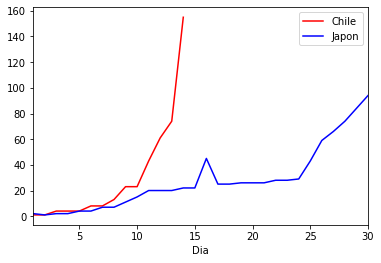

In [222]:
    import matplotlib.pyplot as plt

    ax = dfCL.plot(x='Dia', y='Casos',  color="Red")
    dfJP.plot(ax=ax, x='Dia', y='Casos',  color="Blue")
    ax.legend(["Chile", "Japon"]);